<a href="https://colab.research.google.com/github/mwoodward1990/colab-notebooks-general-collection/blob/main/StockPortfolioOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program attempts to optimize a users portfolio using the Efficient Frontier

# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# Get the stock symbols / tickers in the portfolio
# This is a fictional portfolio to use and try to optimize
# FAANG = (FB - Facebook, AMZN - Amazon, AAPL - Apple, NFLX - Netflix, GOOG - Google/Alphabet)
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

cryptoAssets = ['USD/BTC']

In [ ]:
# Assign weights to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# Get the stock / portfolio starting date
stockStartDate = '2013-01-01'

In [ ]:
# Get the stocks end date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-09-12'

In [ ]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [ ]:
# Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.094694,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.878920,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.408764,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.312239,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.356150,13.880000,365.280823
...,...,...,...,...,...
2020-09-03,291.119995,3368.000000,120.879997,525.750000,1641.839966
2020-09-04,282.730011,3294.620117,120.959999,516.049988,1591.040039
2020-09-08,271.160004,3149.840088,112.820000,507.019989,1532.390015


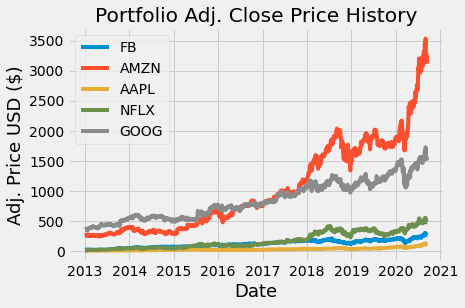

In [ ]:
# Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [ ]:
# Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005883,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-09-03,-0.037620,-0.046284,-0.080061,-0.049002,-0.050015
2020-09-04,-0.028820,-0.021787,0.000662,-0.018450,-0.030941
2020-09-08,-0.040922,-0.043944,-0.067295,-0.017498,-0.036863


In [ ]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118101,0.053412,0.043131,0.056212,0.049545
AMZN,0.053412,0.093160,0.037771,0.062418,0.047420
AAPL,0.043131,0.037771,0.080053,0.033587,0.038020
NFLX,0.056212,0.062418,0.033587,0.212977,0.049693
GOOG,0.049545,0.047420,0.038020,0.049693,0.065557


In [ ]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06049069140279589

In [ ]:
# Calculate the portfolio volatility a.k.a standard deviation
port_volatilty = np.sqrt(port_variance)
port_volatilty

0.24594855438240718

In [ ]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.36140823048660564

In [ ]:
# Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatilty, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: ' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual return: 36.0%
Annual volatility / risk: 25.0%
Annual variance: 6.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.9MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Portfolio Optimization !

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize for max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.09582), ('AMZN', 0.34185), ('AAPL', 0.23535), ('NFLX', 0.32698), ('GOOG', 0.0)])
Expected annual return: 42.7%
Annual volatility: 27.1%
Sharpe Ratio: 1.50


(0.4267105100801507, 0.27082094058160405, 1.5017690626386413)

In [ ]:
# Get the discreet allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 3000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'FB': 2, 'AAPL': 7, 'NFLX': 3}
Funds remaining: $219.72
